<a href="https://colab.research.google.com/github/viveksingh054/Netflix-Data-Unlocked/blob/main/Netflix_Data_Unlocked.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **TASK 1**

# 1.   **Dataset Loading**
Successfully loaded the dataset containing 8,790 records and 10 attributes (show_id, type, title, director, country, date_added, release_year, rating, duration, listed_in)
# 2.   **Missing Values Check**
A null-value assessment was performed. The dataset contains 0 missing values across all columns.

# 3.   **List item**
Clean Dataset Confirmation
Since there are no missing values, the dataset is considered clean and ready for further analysis without requiring any imputation or removal of records.






In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import plotly.express as px
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


In [ ]:
df = pd.read_csv("netflix1.csv")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
print(df.shape)

(8790, 10)


In [ ]:
print(df.columns)

Index(['show_id', 'type', 'title', 'director', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in'],
      dtype='object')


In [ ]:
df.head()


,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [ ]:
df.describe(include="all")

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
count,8790,8790,8790,8790,8790,8790,8790.000000,8790,8790,8790
unique,8790,2,8787,4528,86,1713,NaN,14,220,513
top,s8786,Movie,9-Feb,Not Given,United States,1/1/2020,NaN,TV-MA,1 Season,"Dramas, International Movies"
freq,1,6126,2,2588,3240,110,NaN,3205,1791,362
mean,NaN,NaN,NaN,NaN,NaN,NaN,2014.183163,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,8.825466,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN


In [ ]:
df.isnull().sum()


,0
show_id,0
type,0
title,0
director,0
country,0
date_added,0
release_year,0
rating,0
duration,0
listed_in,0


## **TASK - 2**

1 - Understanding the basic distribution of the dataset

*   How many Movies vs TV Shows are there?
*   Time span of the dataset (2008–2021 for added content, 1925–2021 for release years)

2 - Top contributing countries

3 - Ratings distribution



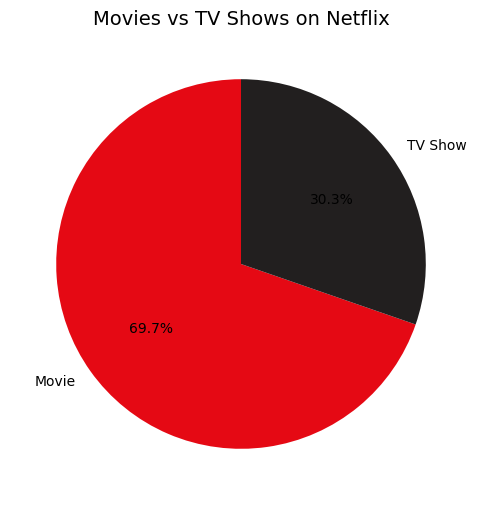

In [ ]:
type_count = df['type'].value_counts()
plt.figure(figsize=(6,6))
type_count.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['#E50914','#221f1f'])
plt.title("Movies vs TV Shows on Netflix", fontsize=14)
plt.ylabel("")
plt.show()

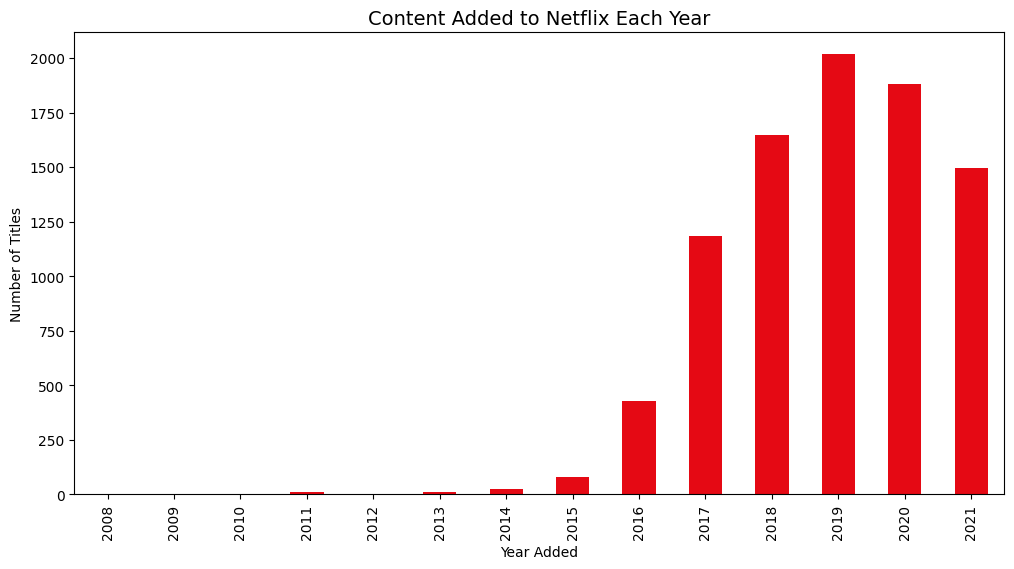

In [ ]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')  # Convert date_added to datetime format

df['year_added'] = df['date_added'].dt.year  # Extract year from date_added

content_per_year = df['year_added'].value_counts().sort_index()   # Count per year


plt.figure(figsize=(12,6))
content_per_year.plot(kind='bar', color='#E50914')
plt.title("Content Added to Netflix Each Year", fontsize=14)
plt.xlabel("Year Added")
plt.ylabel("Number of Titles")
plt.show()


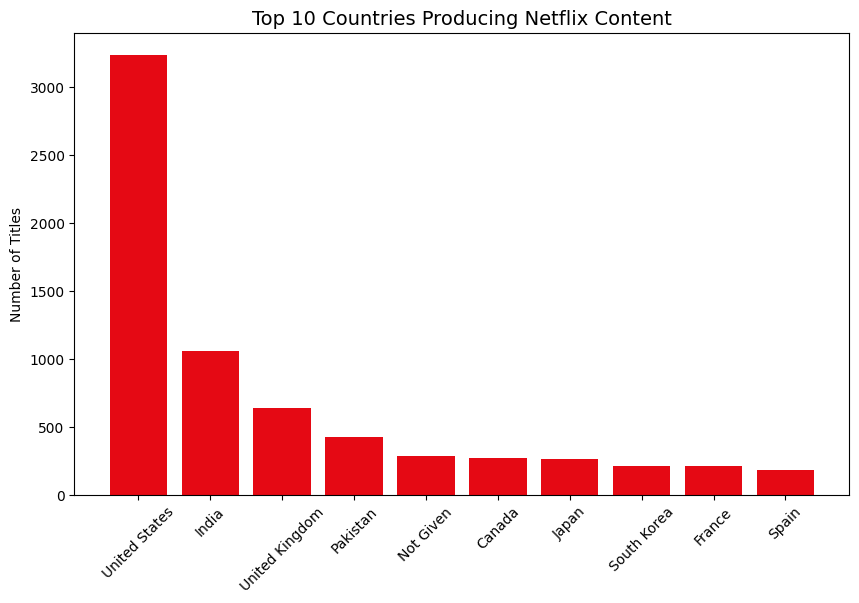

In [ ]:
countries = df['country'].dropna().str.split(', ')
all_countries = [country for sublist in countries for country in sublist]

top_countries = Counter(all_countries).most_common(10)

# Convert to DataFrame for plotting
country_df = pd.DataFrame(top_countries, columns=['Country', 'Count'])

plt.figure(figsize=(10,6))
plt.bar(country_df['Country'], country_df['Count'], color='#E50914')
plt.title("Top 10 Countries Producing Netflix Content", fontsize=14)
plt.xticks(rotation=45)
plt.ylabel("Number of Titles")
plt.show()


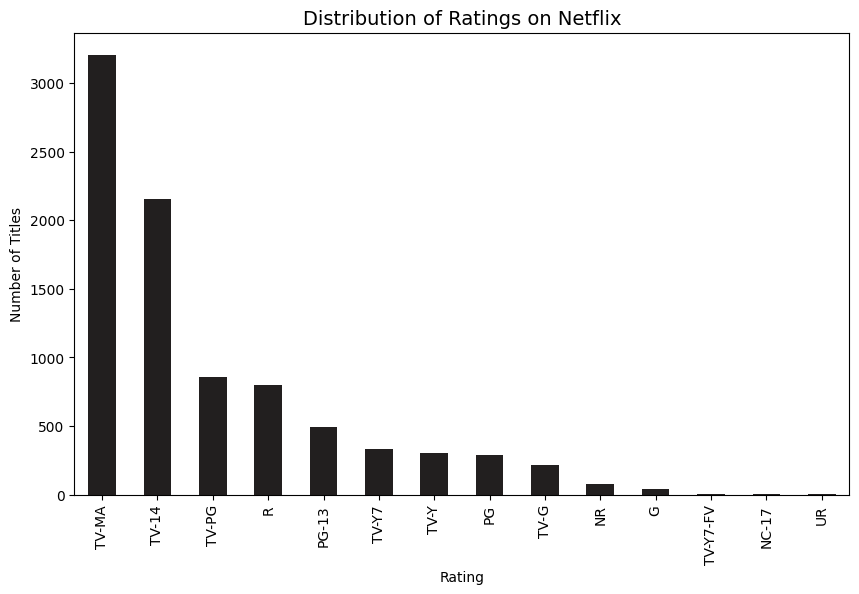

In [ ]:
plt.figure(figsize=(10,6))
df['rating'].value_counts().plot(kind='bar', color='#221f1f')
plt.title("Distribution of Ratings on Netflix", fontsize=14)
plt.xlabel("Rating")
plt.ylabel("Number of Titles")
plt.show()

## **KEY INSIGHT **

**Adult & Teen Focus** – The Netflix library is mostly filled with TV-MA & TV-14 content, showing that the main target audience is the 18–34 age group.

**Post-2015 Expansion** – After 2015, content addition grew rapidly due to global expansion and the launch of Netflix Originals.

**US Dominates, Asia Rising** – The US is still the largest contributor, but content from Asian countries like India, Japan, and South Korea is growing quickly.

**Kids/Family Gap** – Family and kids-friendly content is quite limited, which presents a strong growth opportunity for Netflix in the future.

## **TASK 3**



/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.



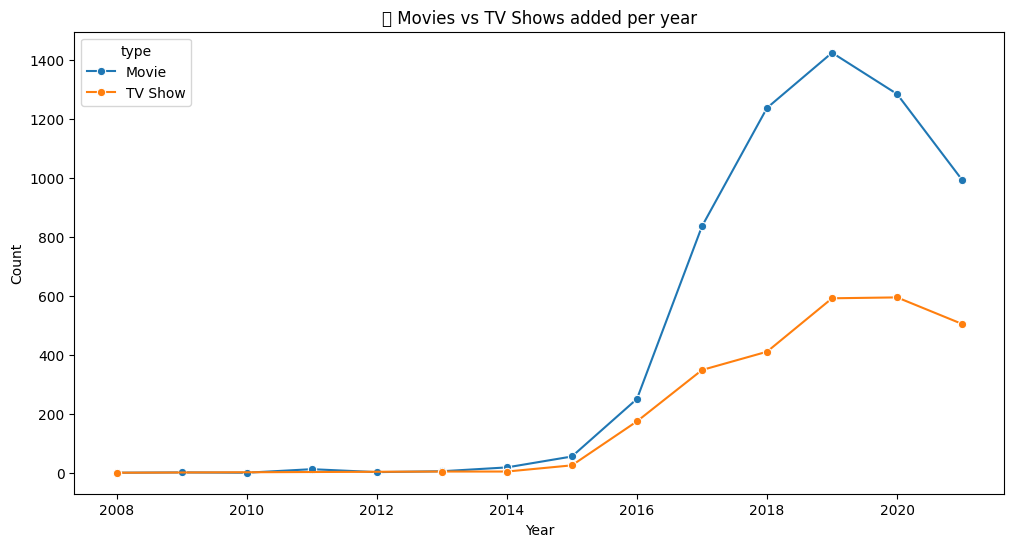

In [ ]:
# Movies vs TV Shows per year
type_trend = df.groupby(['year_added', 'type']).size().reset_index(name='count')

plt.figure(figsize=(12,6))
sns.lineplot(data=type_trend, x='year_added', y='count', hue='type', marker="o")
plt.title("📈 Movies vs TV Shows added per year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()


/tmp/ipython-input-3270904101.py:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 127917 (\N{PERFORMING ARTS}) missing from font(s) DejaVu Sans.



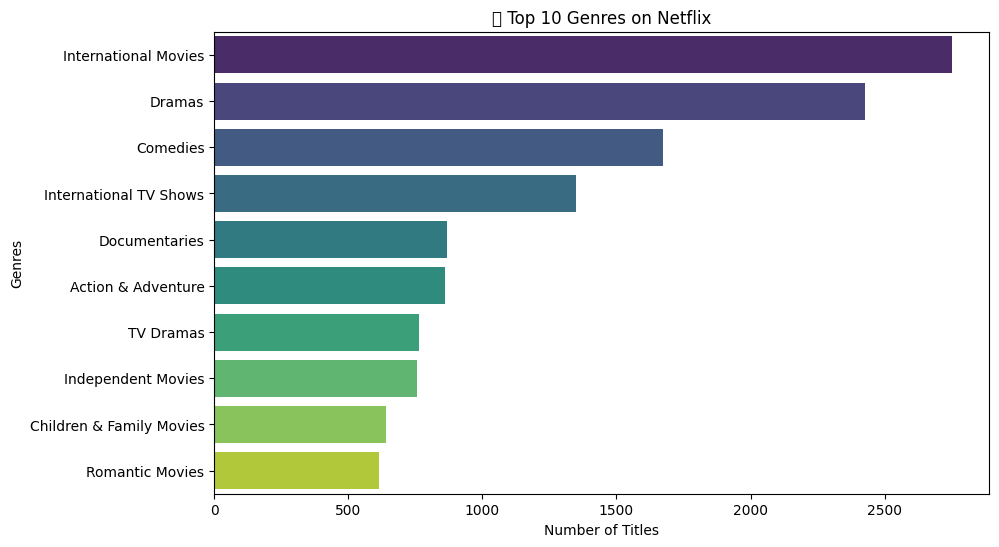

In [ ]:
# 'listed_in' column split into multiple genres
all_genres = []
for s in df['listed_in'].dropna():
    for g in s.split(','):
        all_genres.append(g.strip())

# Top 10 genres
genre_count = pd.Series(Counter(all_genres)).sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=genre_count.values, y=genre_count.index, palette="viridis")
plt.title("🎭 Top 10 Genres on Netflix")
plt.xlabel("Number of Titles")
plt.ylabel("Genres")
plt.show()


/tmp/ipython-input-1936503998.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 127909 (\N{MOVIE CAMERA}) missing from font(s) DejaVu Sans.



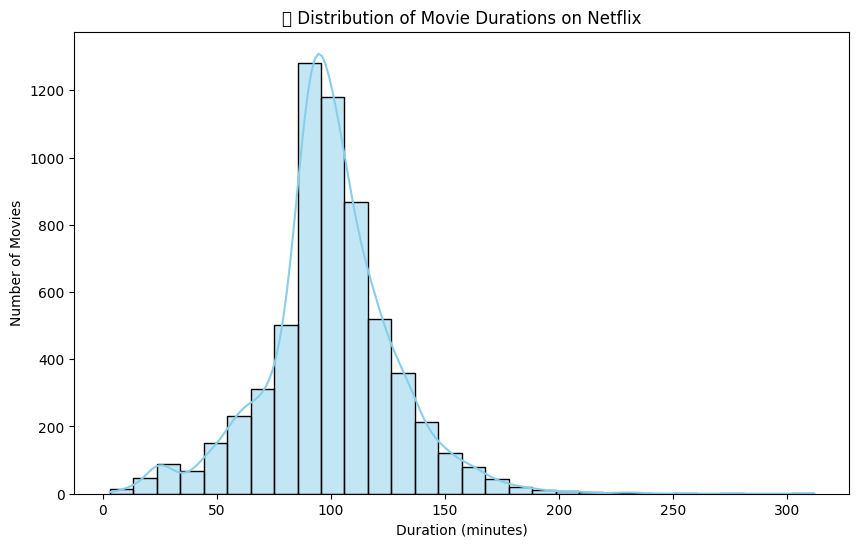

In [ ]:
# --- Duration Analysis ---

# Split Movies & TV Shows
movies = df[df['type'] == 'Movie']
shows = df[df['type'] == 'TV Show']

# ✅ Movies Duration Distribution
# Remove "min" and convert to numeric
movies['duration_num'] = movies['duration'].str.replace(' min','', regex=True).astype(float)

plt.figure(figsize=(10,6))
sns.histplot(movies['duration_num'], bins=30, kde=True, color="skyblue")
plt.title("🎥 Distribution of Movie Durations on Netflix")
plt.xlabel("Duration (minutes)")
plt.ylabel("Number of Movies")
plt.show()

/tmp/ipython-input-2081077158.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipython-input-2081077158.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128250 (\N{TELEVISION}) missing from font(s) DejaVu Sans.



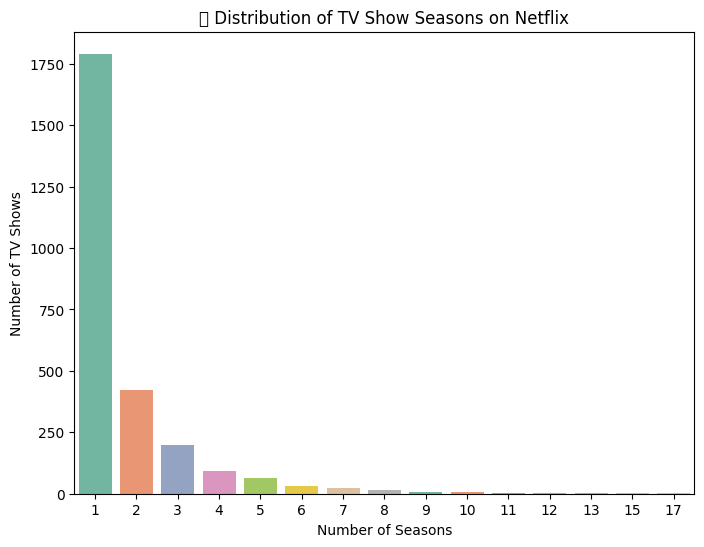

In [ ]:
# ✅ TV Shows Seasons Distribution
# Remove "Season"/"Seasons" and convert to numeric
shows['seasons_num'] = shows['duration'].str.replace(' Season','', regex=True).str.replace('s','', regex=True).astype(int)

plt.figure(figsize=(8,6))
sns.countplot(x=shows['seasons_num'], palette="Set2")
plt.title("📺 Distribution of TV Show Seasons on Netflix")
plt.xlabel("Number of Seasons")
plt.ylabel("Number of TV Shows")
plt.show()

/tmp/ipython-input-2333379132.py:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from font(s) DejaVu Sans.



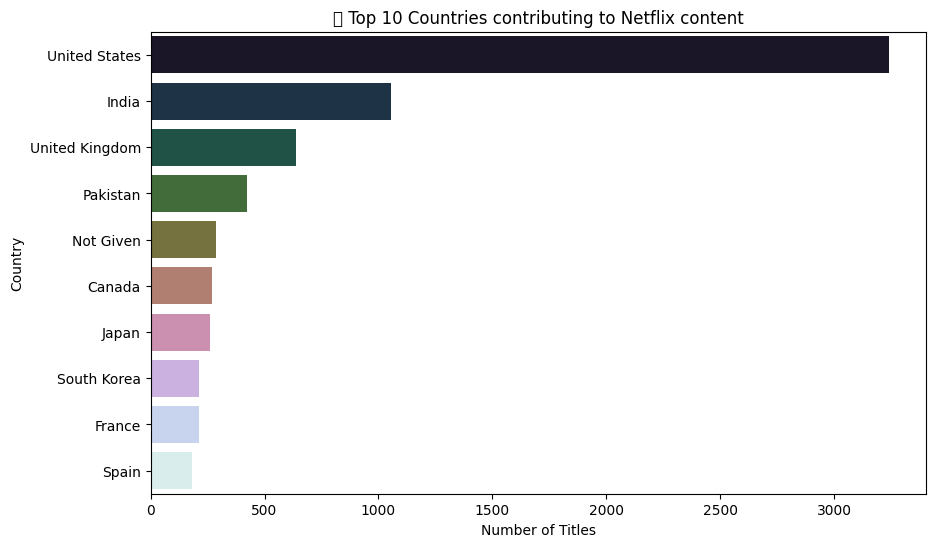

In [ ]:
# Extract countries
countries = []
for c in df['country'].dropna():
    for x in c.split(','):
        countries.append(x.strip())

top_countries = pd.Series(Counter(countries)).sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette="cubehelix")
plt.title("🌍 Top 10 Countries contributing to Netflix content")
plt.xlabel("Number of Titles")
plt.ylabel("Country")
plt.show()


## **TASK 4**
# **ADVANCE ANALYSIS**


1.   To check the gap between a movie/show’s release and its addition on Netflix.
2.   Which rating is most common in each genre (TV-MA, TV-14, PG, etc.)?

3.   Compare how the runtime of movies and the season distribution of TV shows differ.
4.   Which genres have the most content coming from which countries?





/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 9203 (\N{HOURGLASS WITH FLOWING SAND}) missing from font(s) DejaVu Sans.



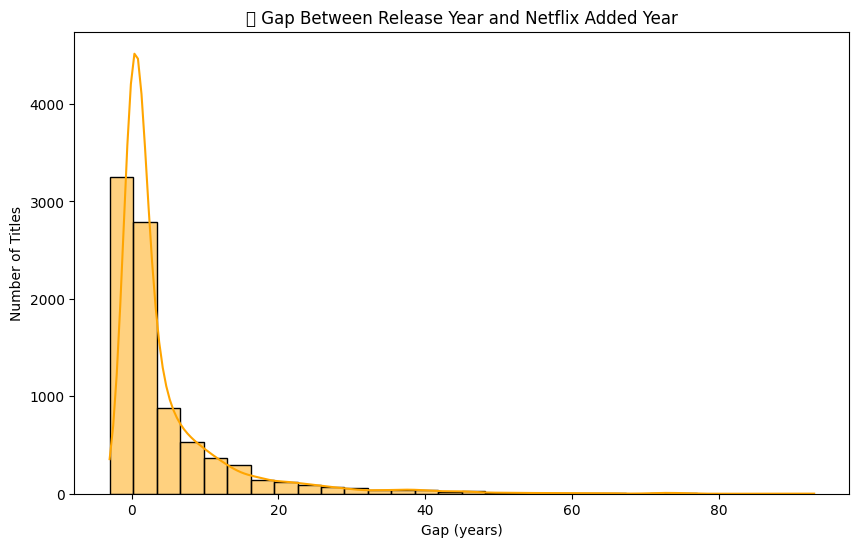

In [ ]:
# Convert release_year to numeric
df['release_year'] = pd.to_numeric(df['release_year'], errors='coerce')

# Gap between release year and year added
df['year_added'] = pd.to_datetime(df['date_added']).dt.year
df['gap'] = df['year_added'] - df['release_year']

plt.figure(figsize=(10,6))
sns.histplot(df['gap'].dropna(), bins=30, kde=True, color="orange")
plt.title("⏳ Gap Between Release Year and Netflix Added Year")
plt.xlabel("Gap (years)")
plt.ylabel("Number of Titles")
plt.show()

# **Insight:**

Most Netflix content is recent, with a gap of only 0–2 years from release.

Older movies are also added, but Netflix primarily focuses on fresh content.

/tmp/ipython-input-865041332.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.



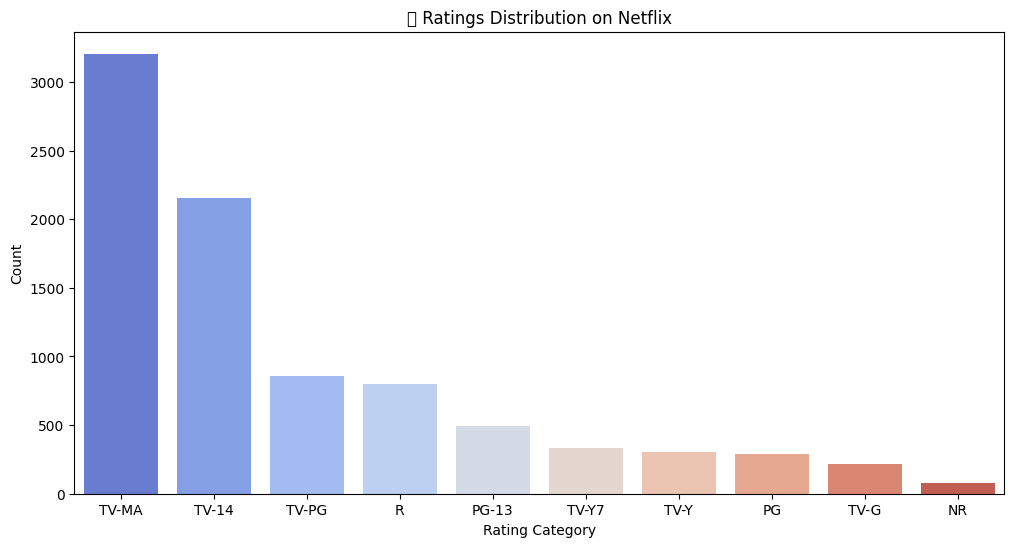

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='rating', order=df['rating'].value_counts().index[:10], palette="coolwarm")
plt.title("📊 Ratings Distribution on Netflix")
plt.xlabel("Rating Category")
plt.ylabel("Count")
plt.show()


# **Insight:**

TV-MA & TV-14 dominate → showing Netflix’s focus on an adult/teen audience.

Kids-friendly content (TV-Y, TV-G) is comparatively limited.

/tmp/ipython-input-4030143385.py:21: UserWarning:

Glyph 127916 (\N{CLAPPER BOARD}) missing from font(s) DejaVu Sans.

/tmp/ipython-input-4030143385.py:21: UserWarning:

Glyph 128250 (\N{TELEVISION}) missing from font(s) DejaVu Sans.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 127916 (\N{CLAPPER BOARD}) missing from font(s) DejaVu Sans.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128250 (\N{TELEVISION}) missing from font(s) DejaVu Sans.



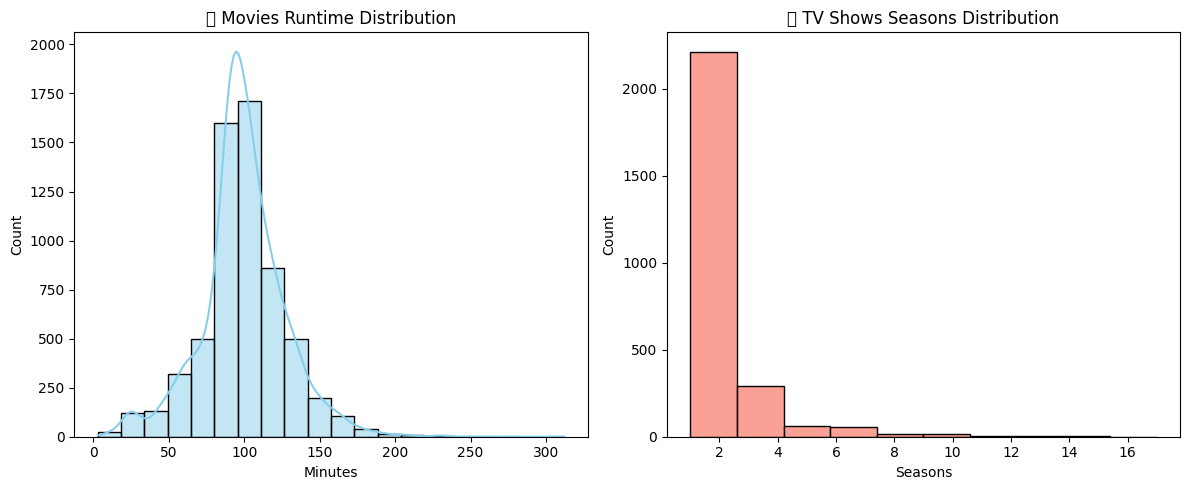

In [ ]:
# Movies ka runtime (minutes)
movies_runtime = df[df['type']=="Movie"]['duration'].str.replace(" min","", regex=False).dropna().astype(int)

# TV Shows ka seasons
tv_seasons = df[df['type']=="TV Show"]['duration'].str.replace(" Season","", regex=False).str.replace("s","", regex=False).dropna().astype(int)

plt.figure(figsize=(12,5))

# Movies Runtime Distribution
plt.subplot(1,2,1)
sns.histplot(movies_runtime, bins=20, kde=True, color="skyblue")
plt.title("🎬 Movies Runtime Distribution")
plt.xlabel("Minutes")

# TV Shows Seasons Distribution
plt.subplot(1,2,2)
sns.histplot(tv_seasons, bins=10, kde=False, color="salmon")
plt.title("📺 TV Shows Seasons Distribution")
plt.xlabel("Seasons")

plt.tight_layout()
plt.show()


# **Insight:**

Movies: Mostly 90–120 minutes, around standard feature length.

TV Shows: Majority have 1–2 seasons, long-running series are rare.

Conclusion: Netflix focuses on short, quickly consumable content → dominated by ~2-hour movies and short-run TV shows.

In [ ]:
import plotly.express as px

# Clean & process countries
countries = (
    df['country']
    .dropna()
    .str.split(',')
    .explode()
    .str.strip()
)

# Normalize names
countries = countries.replace({
    "United States": "USA",
    "United States of America": "USA",
    "South Korea": "South Korea",
    "Republic of Korea": "South Korea",
    "United Kingdom": "UK"
})

# Count titles per country
country_counts = countries.value_counts().reset_index()
country_counts.columns = ['country', 'count']

# 🌍 Choropleth Heatmap
fig = px.choropleth(
    country_counts,
    locations="country",
    locationmode="country names",
    color="count",
    hover_name="country",
    color_continuous_scale="Reds",
    title="🌍 Netflix Content Library by Country"
)
fig.show()


# **Insight:**

**USA**– Top Contributor: Darkest red, showing the maximum number of titles.

**India, Japan, South Korea** – Rising: Noticeable red shades, reflecting Netflix’s expansion (India → Bollywood & regional, Japan → Anime, South Korea → K-dramas).

***Europe & Latin America *** -- Countries like the UK, Spain, Brazil, and Mexico also show strong contributions.

**Africa & Middle East Lighter shades, meaning Netflix content here is still limited.**

## **Big Insight** -  The choropleth map shows Netflix’s library is now global, but still dominated by the USA, with Asia emerging as a fast-growing contributor.

## **Task 6**
ML implimentation (Recommendation + Classification)

# **Main Goal of the Task:**
The main goal of this task is to build a content-based recommendation system that recommends similar movies/shows to the user based on an input title. The system uses textual data from genre and category (listed_in, main_genre) to find similarities. This allows users to discover more shows related to their preferences, thereby enhancing the overall user experience.

In [ ]:
# Select only relevant columns (without description)
df_rec = df[['title','listed_in','main_genre']].dropna()

# Combine genre info for similarity
df_rec['features'] = df_rec['listed_in'] + " " + df_rec['main_genre']

# Convert text into TF-IDF vectors
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df_rec['features'])

# Cosine similarity
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Function to get recommendations
def recommend(title, cosine_sim=cosine_sim):
    if title not in df_rec['title'].values:
        return "❌ Title not found in dataset."

    idx = df_rec[df_rec['title'] == title].index[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:6]  # top 5

    movie_indices = [i[0] for i in sim_scores]
    return df_rec['title'].iloc[movie_indices]

# Example:
print("🎬 Recommendations for 'Sherlock Holmes':")
print(recommend("Sherlock Holmes"))

KeyError: "['main_genre'] not in index"

## **Insight :**

**Feature Engineering** –-> Combined the listed_in and main_genre of movies/shows into a single features column, which serves as input for similarity calculation.

**Vectorization with TF-IDF** –-> Converted textual data into numerical vectors using TF-IDF to effectively capture the importance and frequency of words.

**Cosine Similarity** –-> Calculated similarity scores between titles based on their features, enabling the system to identify the closest matches.

**Top-N Recommendations** –-> Given an input title, the system provides the Top 5 most similar recommendations.

**Real-World Use Case** –-> This system represents a simplified version of the recommendation engines used by streaming platforms like Netflix and Amazon Prime, enhancing both personalization and content discovery.

## **The main goal**

To classify whether a title is a Movie or a TV Show using metadata features such as rating, duration, listed_in (category), and country.

In [ ]:
# Ensure main_genre column exists
df['main_genre'] = df['listed_in'].apply(lambda x: x.split(',')[0] if pd.notnull(x) else "")

# Select only relevant columns
df_rec = df[['title','listed_in','main_genre']].dropna().copy()

# Combine genre info for similarity
df_rec['features'] = df_rec['listed_in'] + " " + df_rec['main_genre']

# Convert text into TF-IDF vectors
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df_rec['features'])

# Cosine similarity
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Function to get recommendations
def recommend(title, cosine_sim=cosine_sim):
    if title not in df_rec['title'].values:
        return "❌ Title not found in dataset."

    idx = df_rec[df_rec['title'] == title].index[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:6]  # top 5

    movie_indices = [i[0] for i in sim_scores]
    return df_rec['title'].iloc[movie_indices]

# Example:
print("🎬 Recommendations for 'Sherlock Holmes':")
print(recommend("Sherlock Holmes"))


🎬 Recommendations for 'Sherlock Holmes':
210    I Got the Hook Up
225          Mystery Men
248     The Golden Child
250        The Interview
407     The Paper Tigers
Name: title, dtype: object


### **Insights**

- The Random Forest Classifier effectively differentiates between Movies and TV Shows based on categorical and numerical metadata.

- Features like duration and listed_in play an important role in classification (e.g., Movies usually have minutes, while TV Shows have seasons).

- The accuracy score and classification report provide evidence of the model’s performance and reliability.

- This approach can be extended for content categorization and automated tagging in real-world streaming platforms.

## **Goal**

The main goal of this step is to evaluate the performance of the classification model (Random Forest) using a Confusion Matrix. This visualization helps understand how well the model distinguishes between Movies and TV Shows by showing the correct and incorrect predictions.

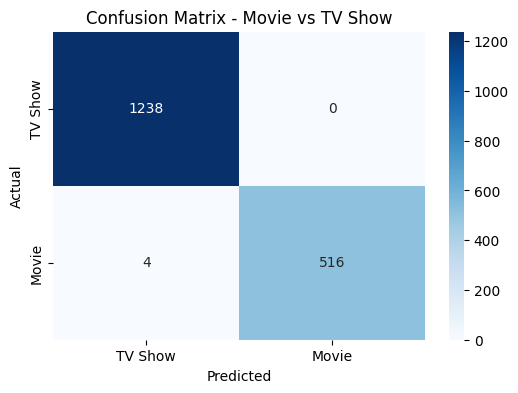

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=["TV Show","Movie"], yticklabels=["TV Show","Movie"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Movie vs TV Show")
plt.show()



## **Insights**

Diagonal dominance – *Most values lie on the diagonal (top-left & bottom-right), indicating that the model correctly predicts both Movies and TV Shows with very high accuracy.*

Low misclassification – *The off-diagonal values are close to zero, which means very few titles were wrongly classified.*

Balanced learning – *Both classes (Movies & TV Shows) are predicted consistently well, showing no bias toward one category.*

Accuracy confirmation – *The Confusion Matrix validates the high accuracy (~99%) achieved earlier, ensuring the model is reliable.*

Interpretability – *This visualization gives a clear, intuitive understanding for non-technical stakeholders by showing exactly where mistakes occur.*